In [ ]:
import requests
import pandas as pd
import time

In [ ]:
!pip install --target python flatten_json
!pip install flatten_json
from flatten_json import flatten

Creating database

I have previously created a file called '40 busiest airports continent.csv'

In [2]:
dataset = pd.read_csv('40_busiest_airports_continent.csv', sep=';')
dataset

web-scraper-order                              web-scraper-start-url  \
0     1669736656-5549  https://www.id1.de/2022/02/24/europes-top-50-l...   
1     1669736656-5550  https://www.id1.de/2022/02/24/europes-top-50-l...   
2     1669736656-5551  https://www.id1.de/2022/02/24/europes-top-50-l...   
3     1669736656-5552  https://www.id1.de/2022/02/24/europes-top-50-l...   
4     1669736656-5553  https://www.id1.de/2022/02/24/europes-top-50-l...   
..                ...                                                ...   
235   1669736956-5634  https://www.id1.de/2021/08/24/north-americas-t...   
236   1669736956-5635  https://www.id1.de/2021/08/24/north-americas-t...   
237   1669736956-5636  https://www.id1.de/2021/08/24/north-americas-t...   
238   1669736956-5637  https://www.id1.de/2021/08/24/north-americas-t...   
239   1669736956-5638  https://www.id1.de/2021/08/24/north-americas-t...   

    sesfea  
0      IST  
1      AMS  
2      FRA  
3      DME  
4      SVO  
..     ...  
235    HOU  
236    RDU  
237    IND  
238    MCI  
239    SJC  

[240 rows x 3 columns]

We only need the column of airport codes.

In [7]:
airport_icaocode = list(dataset.iloc[:,2])
print(list(dataset.iloc[:,2]))

['IST', 'AMS', 'FRA', 'DME', 'SVO', 'SAW', 'CDG', 'MAD', 'LED', 'LHR', 'ATH', 'ORY', 'BCN', 'VKO', 'PMI', 'MUC', 'FCO', 'LIS', 'OSL', 'AER', 'VIE', 'ZRH', 'LPA', 'CPH', 'MXP', 'KBP', 'BRU', 'AYT', 'ARN', 'NCE', 'BER', 'OTP', 'WAW', 'AGP', 'ESB', 'TFN', 'SIP', 'LYS', 'ADB', 'BGO', 'CAN', 'CKG', 'CTU', 'XIY', 'PVG', 'KMG', 'SZX', 'HND', 'DEL', 'PEK', 'CGK', 'PKX', 'SHA', 'HGH', 'NKG', 'CSX', 'KWE', 'WUH', 'CGO', 'XMN', 'TSN', 'URC', 'SGN', 'CJU', 'TAO', 'HAK', 'GMP', 'HRB', 'BLR', 'BOM', 'SHE', 'HET', 'TNA', 'DLC', 'SYX', 'LHW', 'FUK', 'TYN', 'HAN', 'HYD', 'SYD', 'MEL', 'BNE', 'AKL', 'PER', 'ADL', 'CHC', 'OOL', 'WLG', 'CNS', 'CBR', 'HBA', 'DRW', 'NAN', 'ZQN', 'TSV', 'LST', 'NTL', 'NSN', 'DUD', 'MKY', 'POM', 'MCY', 'KTA', 'NPE', 'ROK', 'PMR', 'ASP', 'HTI', 'PHE', 'GLT', 'BNK', 'NPL', 'BME', 'CFS', 'TRG', 'ZNE', 'HLZ', 'AYQ', 'BHE', 'MEX', 'GRU', 'BOG', 'CUN', 'SCL', 'LIM', 'CGH', 'BSB', 'GIG', 'PTY', 'AEP', 'GDL', 'EZE', 'CNF', 'MTY', 'VCP', 'SDU', 'POA', 'REC', 'SSA', 'TIJ', 'CWB', 'FOR'

With the help of the Aviation Reference Data API we can obtain the ICAO codes of the airports and the latitude and longitude data of airports.

Az Aviation Reference Data free API, nyugodtan lehet használni a rapidapi key-t többször is.

Ha nem akarod lefuttatni, kettővel lentebb be tudod tölteni file-ból.

In [ ]:
airportdata = []
for i in airportcode:
  url_part1 = "https://aviation-reference-data.p.rapidapi.com/airports/"
  url_part2 = i
  url = url_part1 + url_part2

  headers = {
    "X-RapidAPI-Key": "11dee70763msh0844be0f0617ba0p1c96ecjsne361c1328931",
    "X-RapidAPI-Host": "aviation-reference-data.p.rapidapi.com"
  }

  response = requests.request("GET", url, headers=headers)
  airportdata.append(response.json())

Saving data to excel

In [ ]:
Airports = pd.DataFrame.from_records(airportdata, index=None)
Airports.to_excel('Airportdata.xlsx')
Airports

iataCode icaoCode                 name alpha2countryCode  latitude  \
0        IST     LTFM             Istanbul                TR   41.2706   
1        AMS     EHAM            Amsterdam                NL   52.3081   
2        FRA     EDDF       FRANKFURT INTL                DE   50.0406   
3        DME     UUDD    Moscow Domodedowo                RU   55.4089   
4        SVO     UUEE  Moscow/Sheremetyevo                RU   55.9728   
..       ...      ...                  ...               ...       ...   
235      HOU     KHOU      WILLIAM P HOBBY                US   29.6524   
236      RDU     KRDU        INTERNATIONAL                US   35.8795   
237      IND     KIND    INDIANAPOLIS INTL                US   39.7172   
238      MCI     KMCI     KANSAS CITY INTL                US   39.2975   
239      SJC     KSJC        SAN JOSE MNPL                US   37.3619   

     longitude  
0     28.74250  
1      4.76420  
2      8.55603  
3     37.90640  
4     37.41470  
..         ...  
235  -95.27720  
236  -78.78710  
237  -86.29440  
238  -94.71390  
239 -121.92900  

[240 rows x 6 columns]

Airports without ICAO codes needs to be removed from the list.

In [ ]:
icao_codes = Airports['icaoCode']
icaocodes = []
for val in icao_codes:
    if val != None :
        icaocodes.append(val)
icaocodes

Querying AeroDataBox API


In [ ]:
AeroDataframe = pd.DataFrame()

for icao in icaocodes:
  url1 = 'https://aerodatabox.p.rapidapi.com/airports/icao/'
  icaokod = icao
  url2 = "/stats/routes/daily"

  url= url1 + icaokod + url2

  headers = {
	"X-RapidAPI-Key": "06e35e1965mshdeeab512c60c0f6p1559e5jsn6784978fd991",
	"X-RapidAPI-Host": "aerodatabox.p.rapidapi.com"
  }

  response2 = requests.request("GET", url, headers=headers)
  routes = response2.json()['routes']

  dictionary = {}
  for key, val in enumerate(routes):
    dictionary[key] = flatten(val)

  df = pd.DataFrame(dictionary)
  df_t = df.transpose()

  df_t['Origin']= icao

  AeroDataframe = AeroDataframe.append(df_t)

  time.sleep(1)  # másodpercenként 1 lekérést küldjön

AeroDataframe

destination_icao destination_iata  \
0              LTBJ              ADB   
1              LTAI              AYT   
2              OIIE              IKA   
3              LTAC              ESB   
4              OEJN              JED   
..              ...              ...   
82             KSAT              SAT   
83             MMCZ              CZM   
84             KSEZ              SDX   
85             KTWF              TWF   
86             KYNG              YNG   

                                  destination_name  \
0                            Adnan Menderes, İzmir   
1                                 Antalya, Antalya   
2                            Imam Khomeini, Tehran   
3                                 Esenboğa, Ankara   
4                           King Abdulaziz, Jeddah   
..                                             ...   
82                        San Antonio, San Antonio   
83                  Cozumel, San Miguel de Cozumel   
84                                  Sedona, Sedona   
85  Joslin Field Magic Valley Regional, Twin Falls   
86   Youngstown Warren Regional, Youngstown/Warren   

                 destination_shortName destination_municipalityName  \
0                       Adnan Menderes                        İzmir   
1                                  NaN                      Antalya   
2                        Imam Khomeini                       Tehran   
3                             Esenboğa                       Ankara   
4                       King Abdulaziz                       Jeddah   
..                                 ...                          ...   
82                                 NaN                  San Antonio   
83                             Cozumel        San Miguel de Cozumel   
84                                 NaN                       Sedona   
85  Joslin Field Magic Valley Regional                   Twin Falls   
86          Youngstown Warren Regional            Youngstown/Warren   

   destination_location_lat destination_location_lon destination_countryCode  \
0                   38.2924                   27.157                      TR   
1                   36.8987                  30.8005                      TR   
2                   35.4161                  51.1522                      IR   
3                   40.1281                  32.9951                      TR   
4                   21.6796                  39.1565                      SA   
..                      ...                      ...                     ...   
82                  29.5337                 -98.4698                      US   
83                  20.5224                 -86.9256                      MX   
84                  34.8486                 -111.788                      US   
85                  42.4818                 -114.488                      US   
86                  41.2607                 -80.6791                      US   

   averageDailyFlights  operators_0_name  ... operators_8_name  \
0                13.44           Pegasus  ...              NaN   
1                13.29          Freebird  ...              NaN   
2                13.29      ATA Airlines  ...              NaN   
3                12.86           Turkish  ...              NaN   
4                 9.16          flyadeal  ...              NaN   
..                 ...               ...  ...              ...   
82                0.14  NetJets Aviation  ...              NaN   
83                0.14               LXJ  ...              NaN   
84                0.14  NetJets Aviation  ...              NaN   
85                0.14  NetJets Aviation  ...              NaN   
86                0.14               LXJ  ...              NaN   

   operators_9_name operators_10_name operators_11_name operators_12_name  \
0               NaN               NaN               NaN               NaN   
1               NaN               NaN               NaN               NaN   
2               NaN               N

In [ ]:
AeroDataframe.to_excel('aerodataframe.xlsx')

Once the limit is reached, I use the saved file going forward (for any additioanl analysis that may happen)

In [ ]:
AeroDataframe = pd.read_excel('aerodataframe.xlsx')

Creating tables for the graph

1. Origin - Destination - Flights

In [ ]:
Utvonalak = AeroDataframe[['Origin','destination_icao', 'averageDailyFlights']]
Utvonalak

Origin destination_icao  averageDailyFlights
0       LTFM             LTBJ                13.44
1       LTFM             LTAI                13.29
2       LTFM             OIIE                13.29
3       LTFM             LTAC                12.86
4       LTFM             OEJN                 9.16
...      ...              ...                  ...
18781   KSJC             KSAT                 0.14
18782   KSJC             MMCZ                 0.14
18783   KSJC             KSEZ                 0.14
18784   KSJC             KTWF                 0.14
18785   KSJC             KYNG                 0.14

[18786 rows x 3 columns]

Delete airports without ICAO

In [ ]:
Utvonalak = Utvonalak[Utvonalak.destination_icao.notnull()]
Utvonalak

2. Airports and their coordinates

In [ ]:
Origin_table = Airports[['icaoCode', 'latitude', 'longitude']]
Destination_table = AeroDataframe[['destination_icao', 'destination_location_lat', 'destination_location_lon']]
Destination_table.rename(columns = {'destination_icao':'icaoCode'}, inplace = True)
Destination_table.rename(columns = {'destination_location_lat':'latitude'}, inplace = True)
Destination_table.rename(columns = {'destination_location_lon':'longitude'}, inplace = True)

coordinates = Origin_table.append(Destination_table)
coordinates

Removing duplicates (for the graph itself no need for duplicates)

In [ ]:
coordinates = coordinates.drop_duplicates(subset=['icaoCode'])
coordinates = coordinates[coordinates.icaoCode.notnull()]
coordinates

3. Building the graph

In [ ]:
 import networkx as nx

In [ ]:
graph = nx.from_pandas_edgelist(Utvonalak, source = 'Origin', target = 'destination_icao',
                        edge_attr = 'averageDailyFlights',create_using = nx.DiGraph())

Visualization

In [ ]:
!pip install basemap

In [ ]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

Specifying map properties

In [ ]:
plt.figure(figsize = (20,15))
m = Basemap(
    projection='robin',
    llcrnrlon=-180,
    llcrnrlat=10,
    urcrnrlon=-50,
    urcrnrlat=70,
    lat_ts=0,
    lon_0=0,
    resolution='c',
    suppress_ticks=True)

<Figure size 1440x1080 with 0 Axes>

The coordinates are sorted into a library according to the network's 'pos' parameter.

In [ ]:
 mx, my = m(coordinates['longitude'].values, coordinates['latitude'].values)
 pos = {}
 for count, elem in enumerate (coordinates['icaoCode']):
     pos[elem] = (mx[count], my[count])

Drawing the map

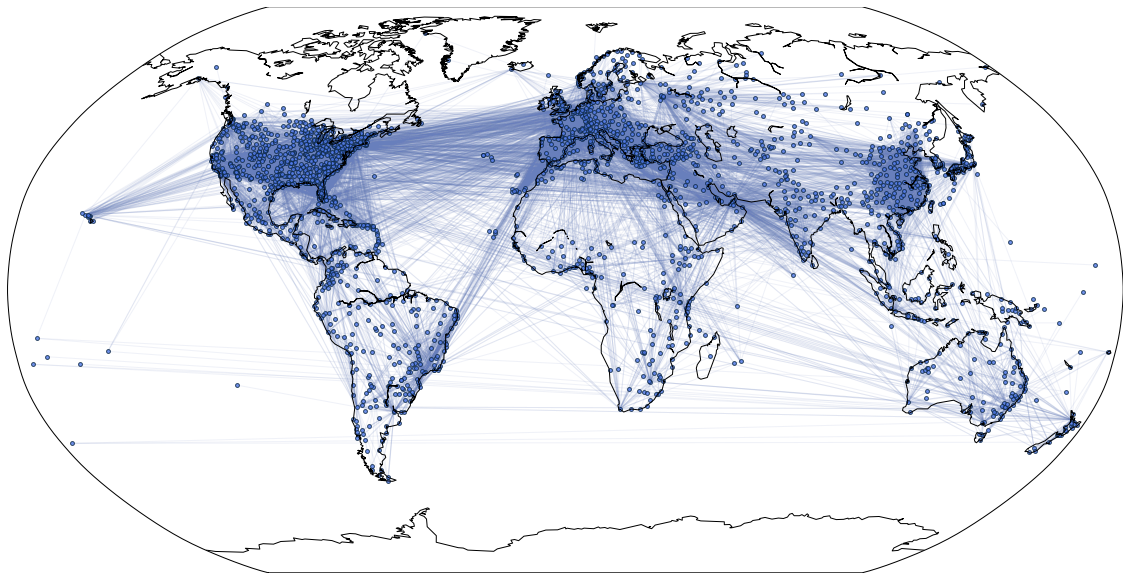

In [ ]:
plt.figure(figsize = (20,15))
m = Basemap(
    projection='robin',
    llcrnrlon=-180,
    llcrnrlat=10,
    urcrnrlon=-50,
    urcrnrlat=70,
    lat_ts=0,
    lon_0=0,
    resolution='c',
    suppress_ticks=True)
nx.draw_networkx_nodes(G = graph, pos=pos,
                        node_color = '#4F79EA', alpha = 0.8, node_size = 15)
nx.draw_networkx_edges(G = graph, pos = pos, edge_color='#687FBC',
                        alpha=0.1, arrows = False)
ax = plt.gca()
ax.collections[0].set_edgecolor("#0B2641")
#m.drawmapboundary(fill_color='black')
m.drawcoastlines()

Centrality measurements

Degree centrality (the degree of a node depends on the number of edges in the node)

In [ ]:
from operator import itemgetter
import operator

In [ ]:
degree = nx.degree_centrality(graph)
degree_table = []
for n in sorted(degree.items(), key=operator.itemgetter(1), reverse=True):
    degree_table.append(n[0])
print(degree_table[0:10])

['LTFM', 'KMIA', 'EDDF', 'LFPG', 'KDFW', 'KORD', 'EHAM', 'OMDB', 'KATL', 'KJFK']


In [ ]:
for i in degree_table[0:10]:
    print(Airports.loc[Airports['icaoCode'] == i, 'name'].item())

Indegree centrality

In [ ]:
indegree = nx.in_degree_centrality(graph)
indegree_table = []
for n in sorted(indegree.items(), key=operator.itemgetter(1), reverse=True):
    indegree_table.append(n[0])
print(indegree_table[0:10])

In [ ]:
for i in indegree_table[1:11]:   # az a nan nem tudom, mi lehet az első helyen, de azt kivettem
    print(Airports.loc[Airports['icaoCode'] == i, 'name'].item())

Betweenness centrality

In [ ]:
kozbev = nx.betweenness_centrality(graph)

kozbev_table = []
for n in sorted(kozbev.items(), key=operator.itemgetter(1), reverse=True):
    kozbev_table.append(n[0])
print(kozbev_table[0:10])

['OMDB', 'LTFM', 'YSSY', 'KLAX', 'EGLL', 'SBGR', 'LFPG', 'NZAA', 'EDDF', 'OTHH']


In [ ]:
for i in kozbev_table[0:10]:
    print(Airports.loc[Airports['icaoCode'] == i, 'name'].item())

Making the map fancy

I put the graph's built-in degree centrality indicator into a dictionary.

In [ ]:
d = dict(graph.degree)
print(d)

{'LTFM': 362, 'LTBJ': 75, 'LTAI': 117, 'OIIE': 65, 'LTAC': 84, 'OEJN': 132, 'LLBG': 44, 'EGLL': 277, 'OMDB': 299, 'LTAJ': 7, 'LFPG': 320, 'LTAF': 7, 'UUWW': 81, 'OEMA': 62, 'LTAU': 9, 'UBBB': 28, 'URSS': 62, 'EDDF': 323, 'UUEE': 120, 'HECA': 153, 'LTCG': 8, 'KJFK': 283, 'LCEN': 5, 'DAAG': 24, 'LYBE': 34, 'OTHH': 222, 'OKBK': 106, 'OLBA': 80, 'DTTA': 75, 'OJAI': 106, 'LGAV': 142, 'EHAM': 311, 'EDDL': 34, 'LOWW': 200, 'UTTT': 20, 'LIMC': 182, 'EBBR': 182, 'LUKK': 13, 'LIRF': 224, 'LROP': 135, 'LTDA': 5, 'UGTB': 21, 'HLLM': 4, 'EDDB': 39, 'OERK': 94, 'LTFG': 4, 'EDDM': 210, 'LTFE': 3, 'LTFH': 6, 'EDDS': 20, 'UAAA': 20, 'LTAN': 6, 'LEMD': 244, 'OBBI': 72, 'LTBS': 3, 'EDDH': 32, 'EGKK': 36, 'LTCI': 5, 'EPWA': 159, 'LTCC': 6, 'LEBL': 206, 'LTAY': 3, 'UUDD': 93, 'ORBI': 35, 'EKCH': 173, 'LSZH': 264, 'LBSF': 26, 'LSGG': 44, 'EGCC': 41, 'VIDP': 144, 'LTCS': 5, 'LIPZ': 25, 'VTBS': 45, 'LHBP': 34, 'LKPR': 32, 'ESSA': 152, 'OMAA': 147, 'LTAZ': 2, 'LYPG': 6, 'ULLI': 98, 'LPPT': 172, 'LFLL': 116, 'O

This can be used to scale and color the nodes.

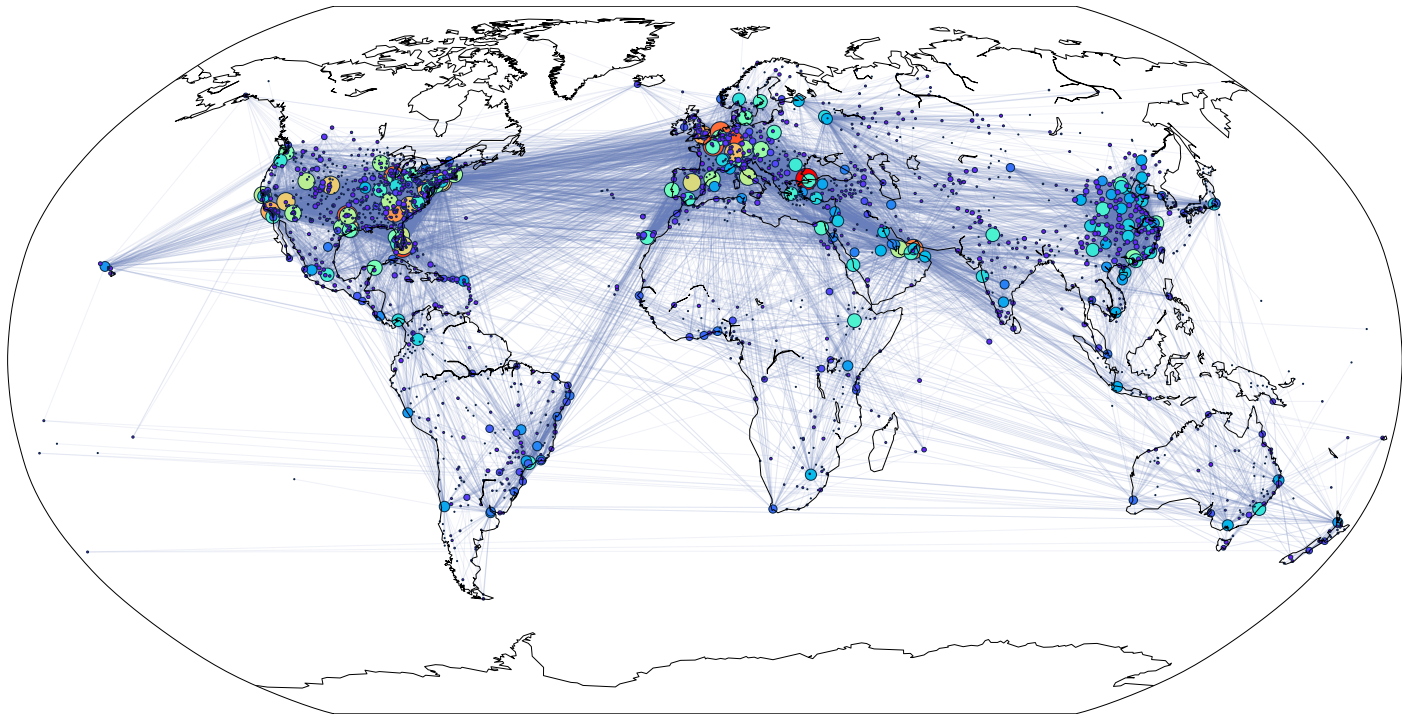

In [ ]:
plt.figure(figsize = (25,15))
m = Basemap(
    projection='robin',
    llcrnrlon=-180,
    llcrnrlat=10,
    urcrnrlon=-50,
    urcrnrlat=70,
    lat_ts=0,
    lon_0=0,
    resolution='c',
    suppress_ticks=True)
nx.draw_networkx_nodes(G = graph, pos=pos, nodelist=d.keys(), node_size=[i*1.3 for i in d.values()],
                        node_color = [i for i in d.values()], cmap = plt.cm.get_cmap('rainbow'))
nx.draw_networkx_edges(G = graph, pos = pos, edge_color= '#687FBC',
                        alpha=0.1, arrows = False)
ax = plt.gca()
ax.collections[0].set_edgecolor("#0B2641")
#m.drawmapboundary(fill_color='black')
m.drawcoastlines()

Without colors

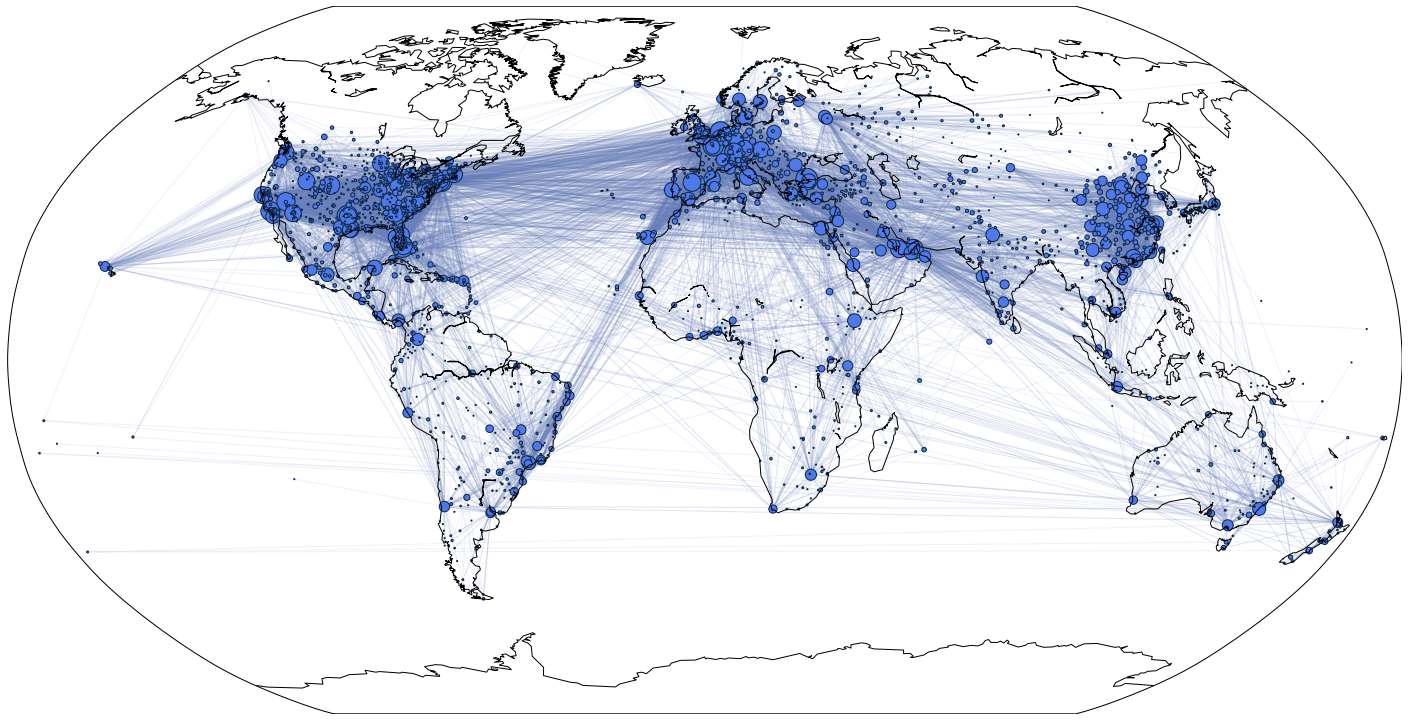

In [ ]:
plt.figure(figsize = (25,15))
m = Basemap(
    projection='robin',
    llcrnrlon=-180,
    llcrnrlat=10,
    urcrnrlon=-50,
    urcrnrlat=70,
    lat_ts=0,
    lon_0=0,
    resolution='c',
    suppress_ticks=True)
nx.draw_networkx_nodes(G = graph, pos=pos, nodelist=d.keys(), node_size=[i*1.3 for i in d.values()],
                        node_color = '#4F79EA')
nx.draw_networkx_edges(G = graph, pos = pos, edge_color= '#687FBC',
                        alpha=0.1, arrows = False)
ax = plt.gca()
ax.collections[0].set_edgecolor("#0B2641")
#m.drawmapboundary(fill_color='black')
m.drawcoastlines()

Betweenness centrality-based map

I am compiling a dictionary of centrality indicators.

In [ ]:
kozbev = nx.betweenness_centrality(graph)

kozbev_dict = {}
for n in sorted(kozbev.items(), key=operator.itemgetter(1), reverse=True):
    kozbev_dict[n[0]] = n[1]
print(kozbev_dict)

{'OMDB': 0.00879661844523683, 'LTFM': 0.006954597315068879, 'YSSY': 0.00574977476085418, 'KLAX': 0.0057041276421746145, 'EGLL': 0.005643014660123165, 'SBGR': 0.005333927376276464, 'LFPG': 0.004768808043909813, 'NZAA': 0.004411057976676746, 'EDDF': 0.004405781395007261, 'OTHH': 0.0042172041602652885, 'YBBN': 0.004060451960396269, 'RJTT': 0.0038827074618580718, 'KJFK': 0.003840854799344149, 'EHAM': 0.0037723674799821395, 'KMIA': 0.0035759938711032117, 'ZGGG': 0.0035701586478212315, 'KDFW': 0.003528877881704114, 'KORD': 0.0032278496446227862, 'KSFO': 0.0030168647258874345, 'YMML': 0.0028321946347230585, 'YPPH': 0.0027321462479632966, 'LPPT': 0.0025743214455081205, 'ZSPD': 0.0025144285595776147, 'ZBAA': 0.002360549660459316, 'LEMD': 0.002325652969161257, 'KIAD': 0.0022151653245130465, 'KIAH': 0.0021889534270166737, 'SCEL': 0.0020355644314364357, 'LSZH': 0.0019652408673058743, 'HAAB': 0.0019484791241037394, 'KATL': 0.0019074230481877295, 'WIII': 0.0016783902742790967, 'LIRF': 0.001657136878

I will use it to scale the nodes.

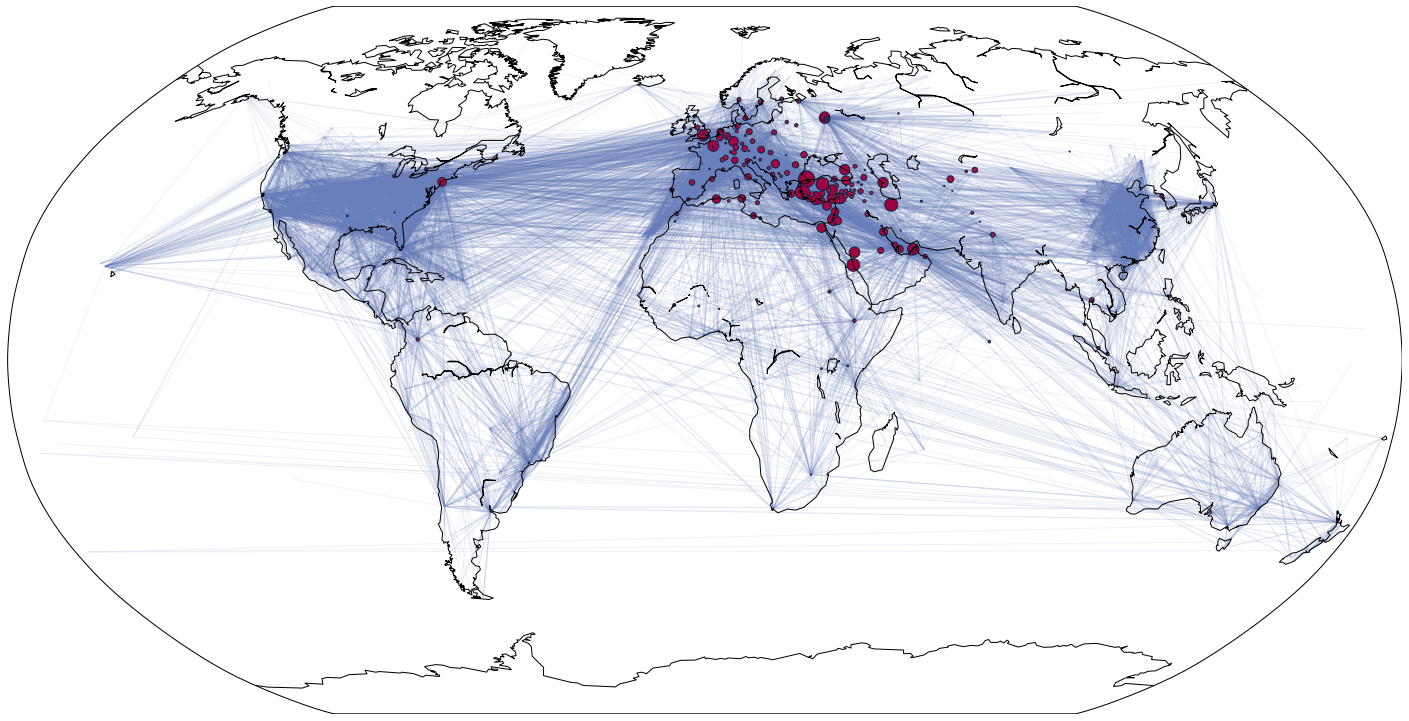

In [ ]:
plt.figure(figsize = (25,15))
m = Basemap(
    projection='robin',
    llcrnrlon=-180,
    llcrnrlat=10,
    urcrnrlon=-50,
    urcrnrlat=70,
    lat_ts=0,
    lon_0=0,
    resolution='c',
    suppress_ticks=True)
nx.draw_networkx_nodes(G = graph, pos=pos, nodelist=d.keys(), node_size=[i* 30000 for i in kozbev_dict.values()],
                        node_color = range(len(kozbev_dict.values())), cmap='Spectral')
nx.draw_networkx_edges(G = graph, pos = pos, edge_color= '#687FBC',
                        alpha=0.1, arrows = False)
ax = plt.gca()
ax.collections[0].set_edgecolor("#0B2641")
#m.drawmapboundary(fill_color='black')
m.drawcoastlines()